**Análisis con Pandas, Matplotlib y seaborn sobre tweets relacionados con Covid-19**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv('covid19_tweets.csv')
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


De la tabla inferior podemos observar nuestras variables no numéricas y podemos observar que nos arroja cuantos datos hay en cada variable, cuantos datos no son repetidos, el que más se repite y las veces que ese dato se repite, esto nos ayuda a ver que cuenta es más activa, dónde se está hablando más del tema, la fecha en que más se habló del tema entre otras cosas, permitiendonos comprender un poco más de lo que sucede en Twitter alrededor del Covid-19.

In [27]:
import numpy as np
data.describe(include=np.object).transpose()

,count,unique,top,freq
user_name,74436,44853,GlobalPandemic.NET,312
user_location,59218,14622,India,1496
user_description,70079,42690,Breaking News & Critical Information to SURVIV...,312
user_created,74436,45554,2010-07-13 21:58:05,312
date,74436,56546,2020-07-29 16:30:00,26
text,74436,74312,Greenland has no active cases of the novel cor...,6
hashtags,53002,23445,['COVID19'],16004
source,74424,450,Twitter Web App,22974


In [18]:
data.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [3]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [4]:
data['user_followers']

0           624
1          2253
2          9275
3           197
4        101009
          ...  
74431        85
74432      4289
74433      1413
74434      2554
74435       310
Name: user_followers, Length: 74436, dtype: int64

In [5]:
data['user_location']

0                  astroworld
1                New York, NY
2            Pewee Valley, KY
3        Stuck in the Middle 
4           Jammu and Kashmir
                 ...         
74431           Lexington, KY
74432           😷 #stayathome
74433             北京, 中华人民共和国
74434                     NaN
74435             Chicago, IL
Name: user_location, Length: 74436, dtype: object

¿Cúantos objetos hay?

In [26]:
count = data.tail
print(count)

<bound method NDFrame.tail of                       user_name         user_location  \
0                        ᏉᎥ☻լꂅϮ            astroworld   
1                 Tom Basile 🇺🇸          New York, NY   
2               Time4fisticuffs      Pewee Valley, KY   
3                   ethel mertz  Stuck in the Middle    
4                      DIPR-J&K     Jammu and Kashmir   
...                         ...                   ...   
74431             Laura Wolfrom         Lexington, KY   
74432  Professor Tonya M. Evans         😷 #stayathome   
74433        People's Daily app           北京, 中华人民共和国   
74434                     M0ser                   NaN   
74435    Your Friend & Sabre ⚔️           Chicago, IL   

                                        user_description         user_created  \
0      wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1      Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2      #Christian #Catholic #Conservative 

* Observamos que tenemos 74436 datos distribuidos en 13 vectores diferentes 

¿Cuál es el valor de la variable 2 del objeto 15?

In [7]:
data['user_friends'][14]

29

¿Cuál es el mínimo y máximo de la variable 3?

De data.describe() el mínimo de la variable 3 es:0 y el máximo es: 2.047197e+06

Con data.drop, lo que hacemos es eliminar las variables que no nos interesan, como lo son los comentarios, las fechas, los hashtags, descripciones, nombres de useario, lo calizaciones, etc. Ya que no nos permiten analizar las cariables numéricas. 

In [8]:
tdata=data.drop(['user_name','user_location','user_description','user_created','user_verified','date','text','hashtags','source','is_retweet'], axis = 1)
print(tdata)

       user_followers  user_friends  user_favourites
0                 624           950            18775
1                2253          1677               24
2                9275          9525             7254
3                 197           987             1488
4              101009           168              101
...               ...           ...              ...
74431              85           586             1902
74432            4289          1066            53569
74433            1413           102               16
74434            2554          1733           129104
74435             310          1748            60133

[74436 rows x 3 columns]


Ya que tenemos las variables con las que trabajaremos hacemos diagramas de caja que nos permiten visualizar cada uno de los datos y los rangos en los que están distribuidos, esto también nos permite observar la dispersión entre datos.

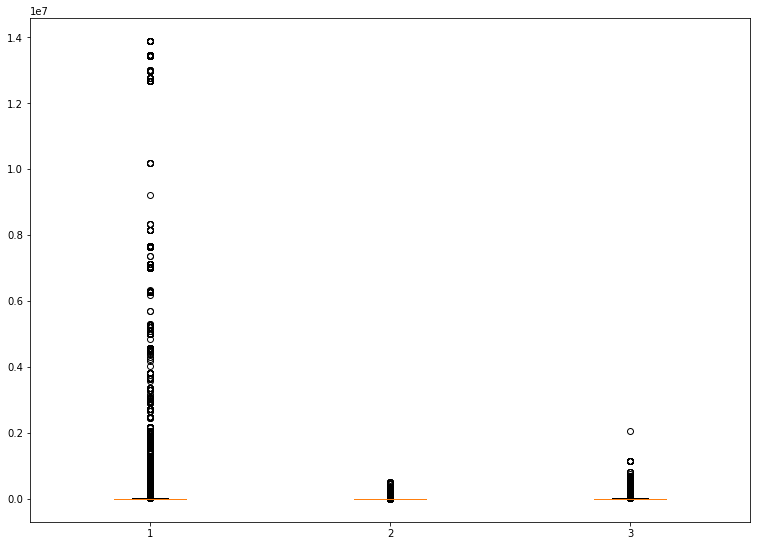

In [9]:
fig = plt.figure(figsize =(10, 7)) 
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
# Creating plot 
bp = ax.boxplot(tdata) 
# show plot 
plt.show() 

Como podemos observar en el gráfico de caja, la variable con mayor rango es la primera la cual corresponde a user_followers y algo que podemos notar es que la mayor concentración de datos de las 3 variables sucede entre los rangos de 0 y 0.2; cosa que también podemos observar en el histograma de abajo, donde en efecto donde hay una gran concentración de datos es en el intervalo anteriormente señalado,

(array([[7.3336e+04, 3.3300e+02, 9.9000e+01, 2.1000e+02, 5.1000e+01,
         2.4400e+02, 2.0000e+00, 5.0000e+00, 0.0000e+00, 1.5600e+02],
        [7.4436e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [7.4435e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([       0. ,  1389284.1,  2778568.2,  4167852.3,  5557136.4,
         6946420.5,  8335704.6,  9724988.7, 11114272.8, 12503556.9,
        13892841. ]),
 <a list of 3 BarContainer objects>)

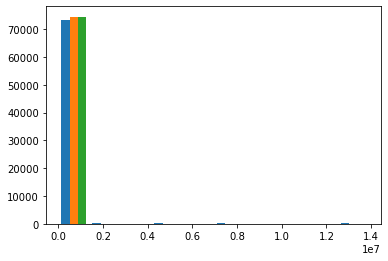

In [15]:
plt.hist(tdata)

In [12]:
tdata.corr(method ='pearson') 

,user_followers,user_friends,user_favourites
user_followers,1.000000,-0.002722,-0.028724
user_friends,-0.002722,1.000000,0.207825
user_favourites,-0.028724,0.207825,1.000000


Posteriormente hacemos un análisis de correlación entre las variables que estamos utilizando para observar si el comportamiento de una influye en la otra, y como podemos observar en la tabla superior la correlación entre variables es casi nula, por lo tanto no se encuentra alguna tendencia que modele la interacción entre variables cuando estas se analizan y grafican.

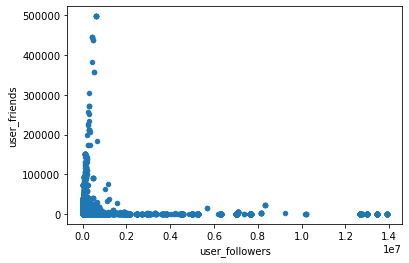

In [23]:
plot1 = tdata.plot('user_followers','user_friends', kind = 'scatter')

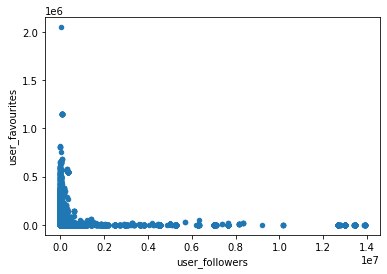

In [24]:
plot2 = tdata.plot('user_followers','user_favourites', kind = 'scatter')

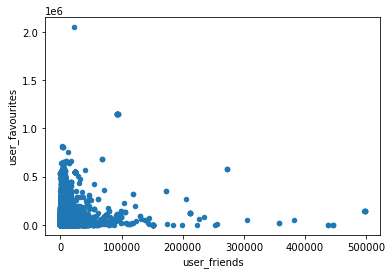

In [25]:
plot3 = tdata.plot('user_friends','user_favourites', kind = 'scatter')

Aunado a lo anterior, podemos observar en los gráficos de dispersión donde se comparan las variables entre ellas no se observa alguna tendencia importante entre ellas, al menos no linealmente, si no que obserbamos una aglomerción de datos en la parte inferior izquirda de los gráficos, y más que modelar una interacción entre variables lo que se observa en los gráficos es cada variable graficada en su respectivo eje mostrando su dispersión.

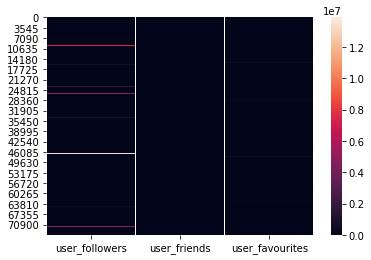

In [30]:
ax = sns.heatmap(tdata)